# A Sample of Evaluating a Trained Model

## Import some necessary modules

In [1]:
import torch
import numpy as np
import argparse
import matplotlib.pyplot as plt
from main import model_prepare, cluster_tsp_solver
from visualisation import plot_the_clustering_2d_with_cycle, plot_task_points

2023-08-24 15:41:55.492776: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-24 15:41:55.536932: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 15:41:56.244328: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load some arguments

In [2]:
args = argparse.Namespace()
args.model_type = 'moe_mlp'
args.clusters_num = 3
args.n_component = 3
args.city_num = 52
args.feature_dim = 2
args.hidden_dim = 128
args.train = False
args.eval = True

First, we need two principe inputs for this evaluation procedure: the trained model and the evaluation sample.

We'll start with the trained model. you may feel free to try your own trained model by replacing the below directory to the one of your model.

In [3]:
args.eval_dir = 'trained_sessions/moe_mlp/rand_50-3/trained_model/batch30400.pt'
model = model_prepare(args)

## Data loader and auxiliaries with background

After loaded the model to evaluate, we'll move on to the data.

### Generate the data

Data can either be generated randomly as follows:

In [ ]:
x = torch.rand([1, 100, 2])

### Import the data

or it can be imported from a file:

In [4]:
x = np.load('tmp/berlin52.npy')
x = np.expand_dims(x, 0)
x = torch.from_numpy(x)

Let's see what is the data like with data visualisation

FileNotFoundError: [Errno 2] No such file or directory: 'fig/task_showcaseThu Aug 24 15:50:54 2023.eps'

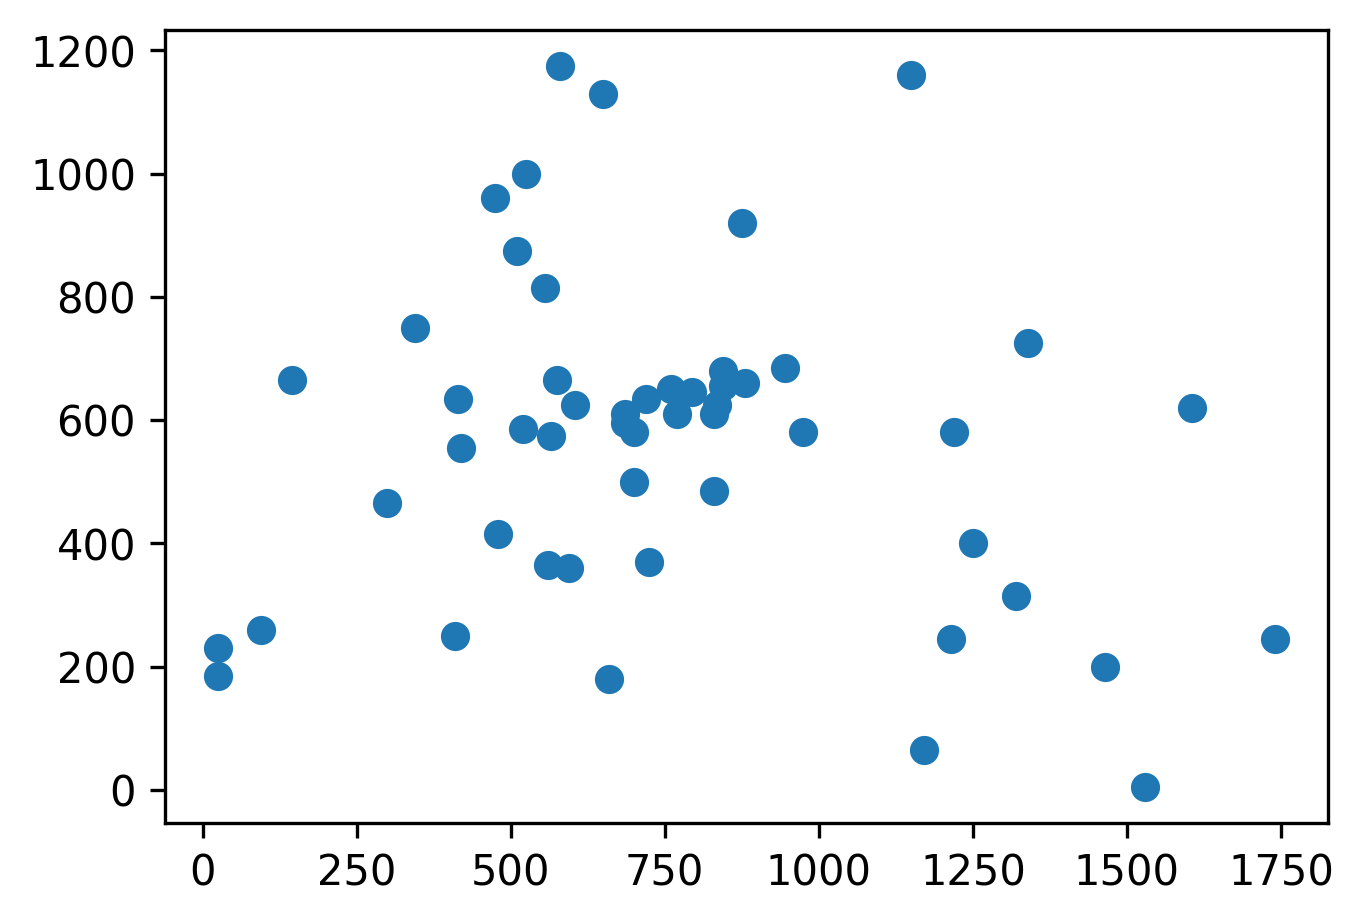

In [5]:
plot_task_points(x[0], showcase_mode='save', save_path='fig/')

The imported data needs normalisation

In [6]:
x = x.to(torch.float32)
x_norm = (x - x.min()) / (x.max() - x.min())

In [7]:
a, logits, log_sample = model(x_norm)

pi, c_d, c_d_origin, degeneration_flag = cluster_tsp_solver(args.clusters_num, m=0, a=a, x=x_norm, degeneration_penalty=10.0)


In [ ]:
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], pi=pi, background=plt.imread('./tmp/Northsea plt.png'))

In [ ]:
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], pi=pi, background=plt.imread('./tmp/Northsea plt.png'), showcase_mode='save',save_path='/Users/masong')

In [10]:
sum(c_d), sum(c_d_origin), degeneration_flag

(4.633028626441956, 4.633028626441956, None)

In [11]:
max(c_d), max(c_d_origin), degeneration_flag

(2.7246761, 2.7246761, None)

In [ ]:
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], draw_cycle=True, pi=pi, showcase_mode='save', save_path='/Users/masong')

In [ ]:
np.save('/home/masong/Desktop/x.npy', x.numpy())

In [ ]:
plt.figure(figsize=[5.0, 5.0], dpi=300.0)
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], 'save', save_path='/Users/masong')


## Data loader and auxiliaries without background

After loaded the model to evaluate, we'll move on to the data.

In [ ]:
x = torch.rand([1, 100, 2])
np.save(open('/Users/masong/taskData.npy', 'wb'), x.numpy())

### Import the data

or it can be imported from a file:

In [ ]:
x = np.load('./tmp/platforms.npy')
x = np.expand_dims(x, 0)
x = torch.from_numpy(x)

Let's see what is the data like with data visualisation

In [ ]:
plt.figure(figsize=[5.0, 5.0], dpi=300.0)
plt.scatter(x[0, :, 0], x[0, :, 1])
plt.savefig('//Users/masong/taskpoints.eps', format='eps')

In [ ]:
a, logits, log_sample = model(x)

pi, c_d, c_d_origin, degeneration_flag = cluster_tsp_solver(args.clusters_num, m=0, a=a, x=x, degeneration_penalty=10.0)


In [ ]:
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], pi, showcase_mode='show')
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], pi, showcase_mode='save', save_path='/Users/masong')

In [ ]:
c_ds = c_d_origin + [max(c_d_origin), sum(c_d_origin)]
f = open('/Users/masong/distances.txt', 'w')
for dist in c_ds:
    f.write(f"{dist}\n")
f.close()

In [ ]:
c_d_origin


In [ ]:
sum(c_d), sum(c_d_origin), degeneration_flag

In [ ]:
max(c_d), max(c_d_origin), degeneration_flag

In [ ]:
plt.figure(figsize=[5.0, 5.0], dpi=300.0)
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], 'save', save_path='/Users/masong')
